In [1]:
import numpy as np
from matplotlib import pyplot as plt
import wordcloud
from bs4 import BeautifulSoup
import os
import re
import spacy
from functools import reduce 

In [2]:
with open("./data/songs/the+kooks_all+over+town.html", "r", encoding='utf-8') as f:
    html_string= f.read()
    
soup = BeautifulSoup(html_string)
text = soup.find('pre', attrs={'class': 'lyric-body'}).text

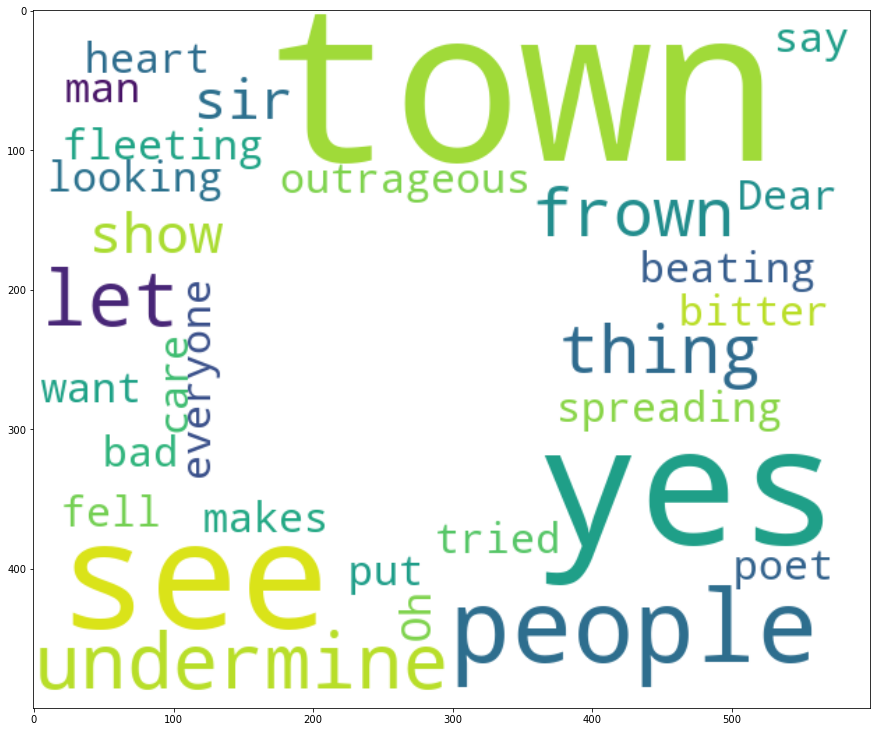

In [3]:
mask = np.zeros((500, 600, 3), np.uint8)
mask[150:350,150:350,:] = 255  # masked out area
cloud = wordcloud.WordCloud(background_color="white",
                max_words=200,
                mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(text)
                # stop words are removed!

plt.figure(figsize = (15,15))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('./data/cloud.png')
plt.show()

In [4]:
lyrics_list = []
artist_list = []
for filename in os.listdir('data/songs/'):
    html_str = open('data/songs/' + filename).read()
    
    # convert to BeautifulSoup object
    soup = BeautifulSoup(html_str)
    try:
        lyrics = soup.find('pre', attrs={'class': 'lyric-body'}).text
        lyrics_list.append(lyrics)
    except AttributeError:
        pass

In [5]:
nlp = spacy.load('en_core_web_md')

In [6]:
def clean_text(corpus, model):
    """preprocess a string (tokens, stopwords, lowercase, lemma & stemming) returns the cleaned result
        params: review - a string
                model - a spacy model
                
        returns: list of cleaned strings
    """
    
    new_doc = []
    doc = model(corpus)
    for word in doc:
        if not word.is_stop and word.is_alpha:
            new_doc.append(word.lemma_.lower())
            
    return new_doc

In [7]:
song_spacy = []
for i in lyrics_list:
    clean_song = clean_text(i, nlp)
    song_spacy.append(clean_song)

In [8]:
flattened = reduce(lambda x, y: x.extend(y), [song_spacy])
flattened[5]

['oh',
 'oh',
 'oh',
 'oh',
 'oh',
 'oh',
 'mm',
 'mmm',
 'ooh',
 'girl',
 'king',
 'woman',
 'yes',
 'father',
 'yes',
 'son',
 'talk',
 'cuz',
 'understand',
 'support',
 'system',
 'live',
 'good',
 'thing',
 'slice',
 'bread',
 'kiss',
 'hug',
 'lip',
 'touch',
 'want',
 'world',
 'know',
 'black',
 'brotha',
 'love',
 'ya',
 'try',
 'hurt',
 'ya',
 'want',
 'know',
 'forever',
 'true',
 'cuz',
 'black',
 'brotha',
 'strong',
 'brotha',
 'ya',
 'want',
 'ya',
 'know',
 'forever',
 'true',
 'misunderstood',
 'good',
 'neighborhood',
 'information',
 'alot',
 'brotha',
 'get',
 'education',
 'check',
 'get',
 'wall',
 'street',
 'brotha',
 'blue',
 'collar',
 'brotha',
 'corner',
 'brotha',
 'talented',
 'brotha',
 'bar',
 'know',
 'angie',
 'love',
 'ya',
 'black',
 'brotha',
 'love',
 'ya',
 'try',
 'hurt',
 'ya',
 'want',
 'know',
 'forever',
 'true',
 'black',
 'brotha',
 'love',
 'ya',
 'try',
 'hurt',
 'ya',
 'want',
 'know',
 'forever',
 'true',
 'mean',
 'need',
 'proud',
 'l

In [10]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
      
    return (str1.join(s)) 
        
string_list = []
for i in flattened:
    flat = listToString(i)
    string_list.append(flat)

In [11]:
cleaned_text = ' '.join(string_list)

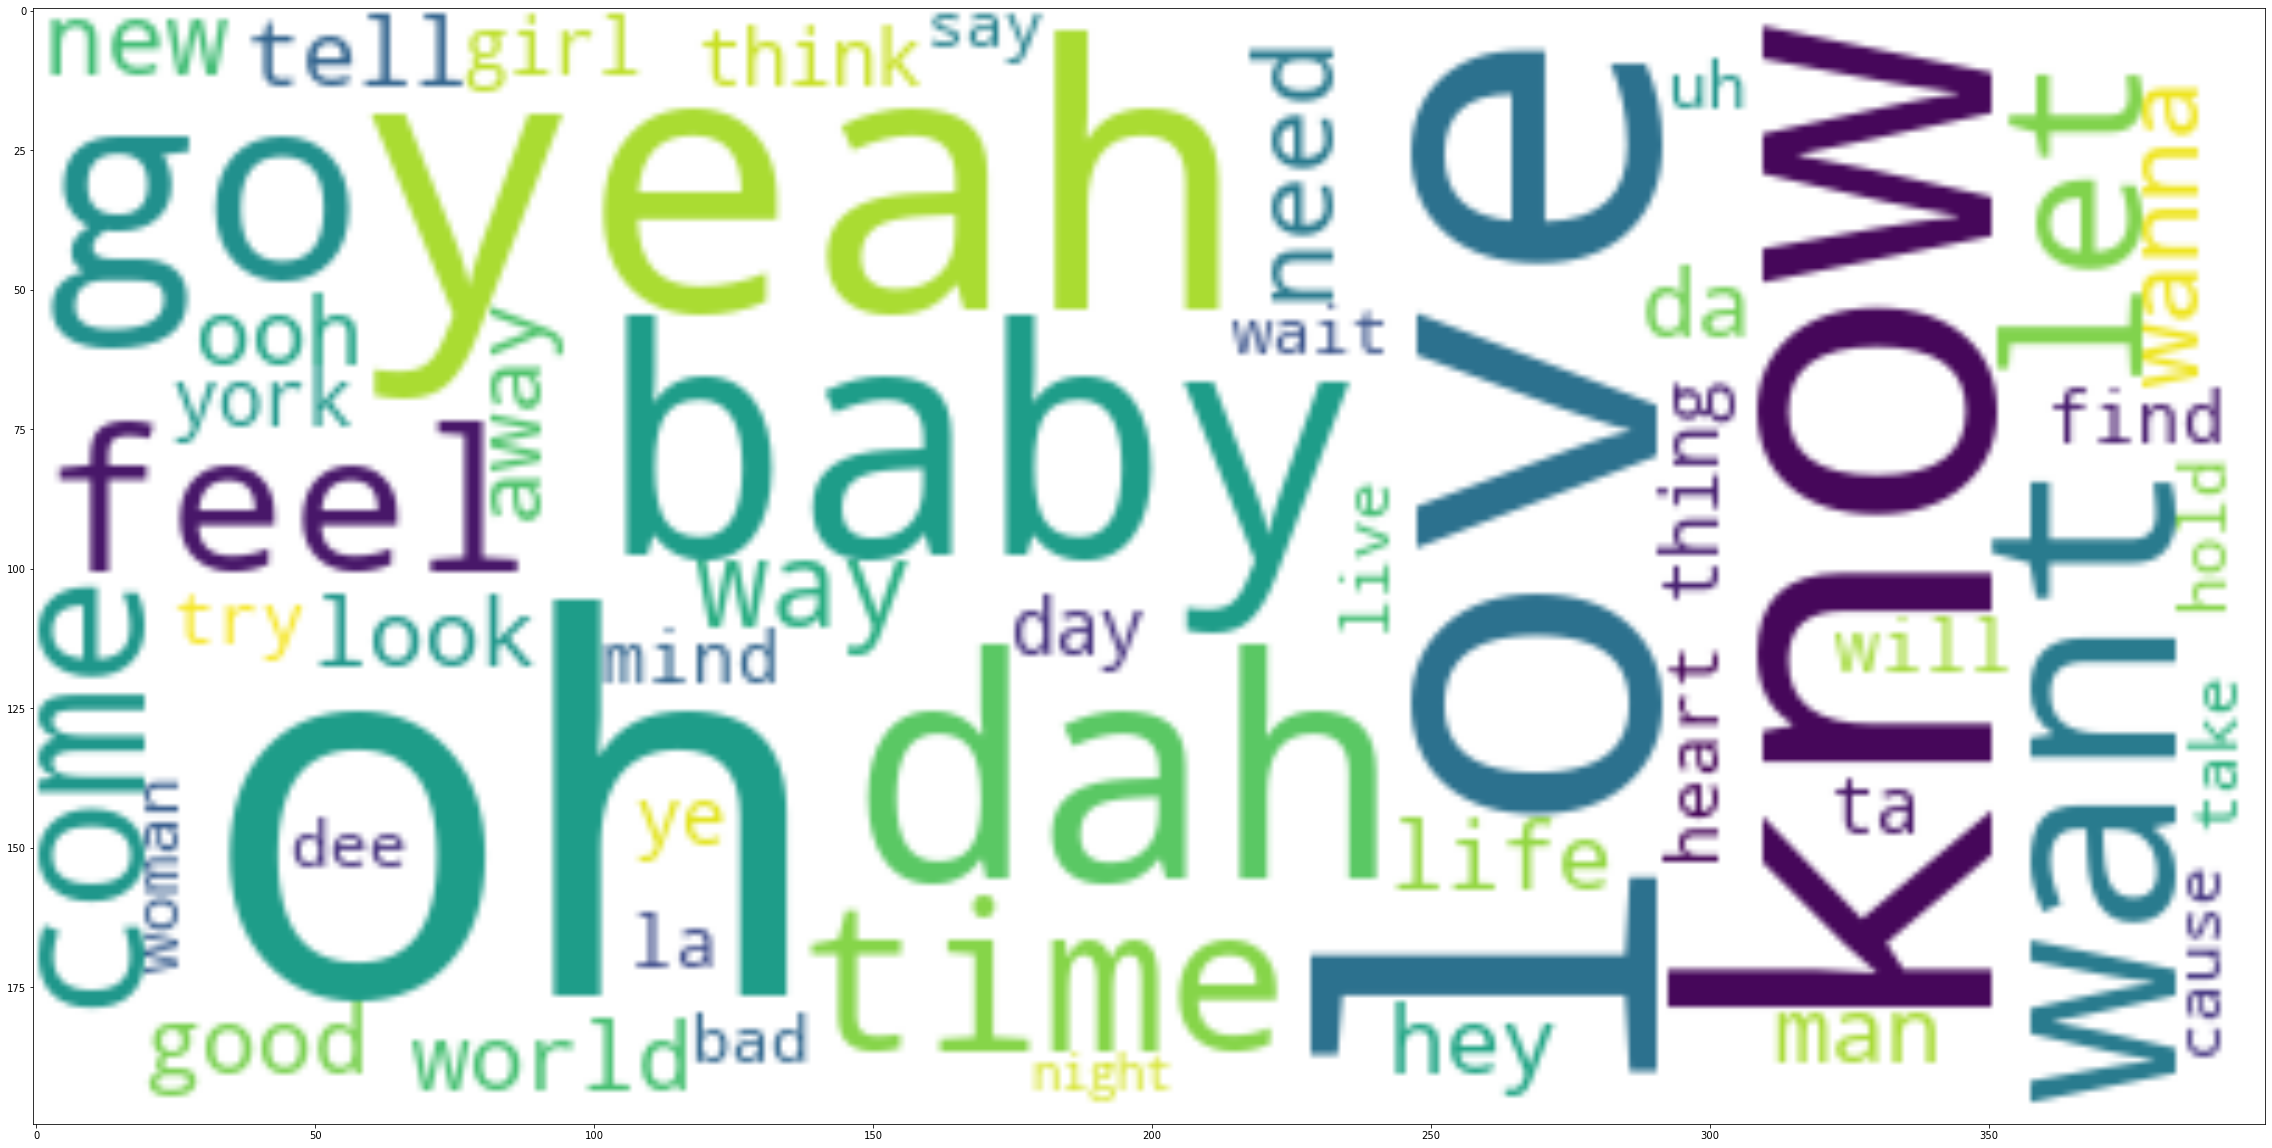

In [12]:
cloud = wordcloud.WordCloud(background_color="white",
                max_words=50,
                #mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(cleaned_text)
                # stop words are removed!

plt.figure(figsize = (40,40))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('./data/cloud.png')
plt.show()